

Once upon a time, in a world of travelers and airlines, there was a dataset called BA_AirlineReviews. It was a treasure trove of opinions, insights, and emotions from passengers who had flown with British Airways.

As a curious data scientist, I embarked on a journey to explore this dataset. I began by examining the shape and structure of the data, discovering its dimensions and the types of information it contained. It was like opening a book and eagerly flipping through its pages.

Next, I encountered missing values, like hidden pieces of a puzzle. With determination, I sought to fill these gaps, carefully dropping columns that were not relevant to my quest. It was a meticulous process, ensuring that the remaining data was clean and ready for analysis.

Delving deeper, I uncovered the distribution of ratings and sentiments expressed by the passengers. It was a fascinating sight, with a clear majority of positive reviews. I visualized this distribution in the form of bar charts and histograms, allowing the data to speak for itself.

As I continued my exploration, I discovered the power of sentiment analysis. I enhanced the existing sentiment polarity scores by incorporating subjectivity, providing a more nuanced understanding of the reviewers' feelings. It was like peeling back layers of an onion, revealing the hidden depths of human emotion.

To further enrich my analysis, I combined the review header and body, creating a comprehensive "FullReview" field. This allowed me to capture the complete context and perspective of each passenger's experience.

With the data prepared, I embarked on the task of sentiment classification. I trained various machine learning models, including XGBoost, Random Forest, and Decision Tree, to predict the sentiment of each review. It was a thrilling process, like training a team of detectives to solve a mystery.

After evaluating the performance of each model, I selected the one that best captured the nuances of the data. With this model in hand, I could now predict the sentiment of any new review with confidence.

As the story reached its climax, I decided to explore the neutral reviews. These were the reviews that fell on the delicate balance between positive and negative sentiment. I analyzed their characteristics and discovered hidden insights about the passengers' experiences.

Finally, I shared my findings with the world, presenting the results of my data analysis in the form of visualizations, reports, and recommendations. It was a satisfying moment, knowing that my work had shed light on the voices of countless travelers.

And so, the story of the BA_AirlineReviews dataset came to a close. It was a journey filled with exploration, discovery, and a deep appreciation for the power of data analysis in understanding human experiences.

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem import PorterStemmer
import re
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


##"British Airways Reviews" dataset
The dataset we will use is the "British Airways Reviews" dataset, which aggregates 3700 anonymized customer reviews, providing a broad perspective on the passenger experience with British Airways. Extracting useful information from such customer reviews is very helpful for improving customer experience and operational efficiency.

**Column Descriptors**:

- OverallRating: The overall rating given by the customer.
- ReviewHeader: The header or title of the customer's review.
- Name: The name of the customer providing the feedback.
- Datetime: The date and time when the feedback was posted.
- VerifiedReview: Indicates whether the review is verified or not.
- ReviewBody: The detailed body of the customer's review.
- TypeOfTraveller: The type of traveler (e.g., Business, Leisure).
- SeatType: Class of the traveler (e.g. Business, Economy).
- Route: The flight route taken by the customer.
- DateFlown: The date when the flight was taken.
- SeatComfort: Rating for seat comfort.
- CabinStaffService: Rating for cabin staff service.
- GroundService: Rating for ground service.
- ValueForMoney: Rating for the value for money.
- Recommended: Whether the customer recommends British Airways.
- Aircraft: The aircraft used for the flight.
- Food&Beverages: Rating for food and beverages.
- InflightEntertainment: Rating for inflight entertainment.
- Wifi&Connectivity: Rating for onboard wifi and connectivity.













In [ ]:
data = pd.read_csv("BA_AirlineReviews.csv")
print(f"Datset shape of amazon alexa : {data.shape}")

Datset shape of amazon alexa : (3701, 20)


## Research Questions
- What are the predominant sentiments expressed by British Airways
passengers in their reviews?
- Can we predict the sentiment of a review based on its content?
- Which aspects of British Airways' service are passengers most satisfied and most dissatisfied with?



##Data Preparation
**Dataset Overview**

- Source: Kaggle [link text](https://www.kaggle.com/datasets/chaudharyanshul/airline-reviews)
- Description: Customer feedback for British Airways from AirlineQuality
- Purpose: To analyze sentiments expressed by passengers




In [ ]:
data.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Unnamed: 0                  0
OverallRating               5
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64


In [ ]:
columns_to_drop = ['Unnamed: 0','TypeOfTraveller','SeatType', 'Datetime','Route','DateFlown','SeatComfort','CabinStaffService','GroundService','ValueForMoney','Aircraft','Food&Beverages','InflightEntertainment','Wifi&Connectivity']

In [ ]:
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
data.head()

,OverallRating,ReviewHeader,Name,VerifiedReview,ReviewBody,Recommended
0,1.0,"""Service level far worse then Ryanair""",L Keele,True,4 Hours before takeoff we received a Mail stat...,no
1,3.0,"""do not upgrade members based on status""",Austin Jones,True,I recently had a delay on British Airways from...,no
2,8.0,"""Flight was smooth and quick""",M A Collie,False,"Boarded on time, but it took ages to get to th...",yes
3,1.0,"""Absolutely hopeless airline""",Nigel Dean,True,"5 days before the flight, we were advised by B...",no
4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,False,"We traveled to Lisbon for our dream vacation, ...",no


In [ ]:
#data[data['TypeOfTraveller'].isna()==True]
#data[data['SeatType'].isna()==True]
#data[data['Route'].isna()==True]
#data[data['DateFlown'].isna()==True]
#data[data['SeatComfort'].isna()==True]
#data[data['CabinStaffService'].isna()==True]
#data[data['GroundService'].isna()==True]
#data[data['ValueForMoney'].isna()==True]
#data[data['Aircraft'].isna()==True]
#data[data['Food&Beverages'].isna()==True]
#data[data['InflightEntertainment'].isna()==True]
#data[data['Wifi&Connectivity'].isna()==True]

In [ ]:
data.dropna(inplace=True)

In [ ]:
print(f"after dropping NAN values:{data.shape}")

after dropping NAN values:(3696, 6)


In [ ]:
data.dtypes

OverallRating     float64
ReviewHeader       object
Name               object
VerifiedReview       bool
ReviewBody         object
Recommended        object
dtype: object

In [ ]:
print(f"Rating vlaue count: \n{data['OverallRating'].value_counts()}")

Rating vlaue count: 
OverallRating
1.0     865
2.0     424
3.0     406
8.0     370
10.0    330
7.0     313
9.0     310
4.0     254
5.0     234
6.0     190
Name: count, dtype: int64


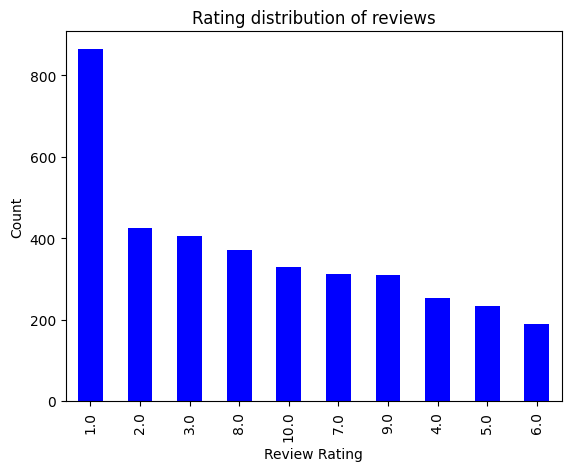

In [ ]:
data['OverallRating'].value_counts().plot.bar(color ='blue')
plt.title('Rating distribution of reviews')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.show()

## Explain the bar chart in points x axis and y axis

### X-axis:
- The x-axis represents the different rating values, ranging from 1 to 5.

### Y-axis:
- The y-axis represents the count of reviews for each rating value.

### Key Points:
- The bar chart shows that the majority of reviews are for a rating of 5, followed by a rating of 4.
- There are relatively few reviews for ratings of 1, 2, and 3.
- This indicates that most passengers have a positive experience with BA Airlines.

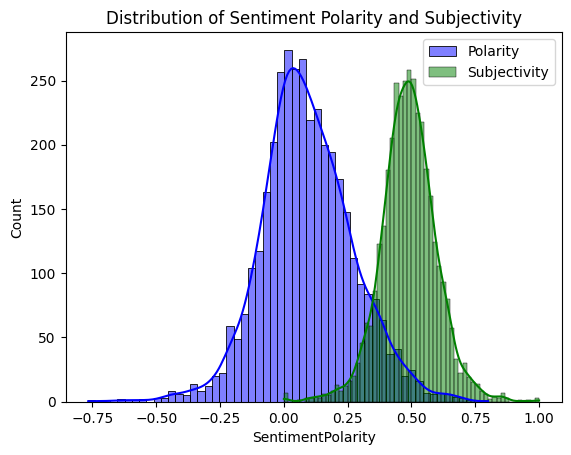

In [ ]:
from textblob import TextBlob

# Enhance the sentiment analysis to include subjectivity
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the enhanced sentiment analysis on the review body
data['SentimentPolarity'], data['SentimentSubjectivity'] = zip(*data['ReviewBody'].apply(get_textblob_sentiment))

# Plotting the distribution of sentiment polarity and subjectivity
sns.histplot(data['SentimentPolarity'], color='blue', kde=True, label='Polarity')
sns.histplot(data['SentimentSubjectivity'], color='green', kde=True, label='Subjectivity')
plt.legend()
plt.title('Distribution of Sentiment Polarity and Subjectivity')
plt.show()

In [ ]:
data['FullReview'] = data['ReviewHeader'] + ' ' + data['ReviewBody']
data.drop(columns=['ReviewHeader', 'ReviewBody'], inplace=True)


In [ ]:
data.head()

,OverallRating,Name,VerifiedReview,Recommended,SentimentPolarity,SentimentSubjectivity,FullReview
0,1.0,L Keele,True,no,-0.045588,0.339216,"""Service level far worse then Ryanair"" 4 Hours..."
1,3.0,Austin Jones,True,no,0.006944,0.367130,"""do not upgrade members based on status"" I rec..."
2,8.0,M A Collie,False,yes,0.128030,0.434091,"""Flight was smooth and quick"" Boarded on time,..."
3,1.0,Nigel Dean,True,no,0.119722,0.585397,"""Absolutely hopeless airline"" 5 days before th..."
4,1.0,Gaylynne Simpson,False,no,-0.084115,0.319444,"""Customer Service is non existent"" We traveled..."


In [ ]:
data['Sentiment'] = data['Recommended'].map({'yes': 1, 'no': 0})

In [ ]:
cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(data.FullReview)

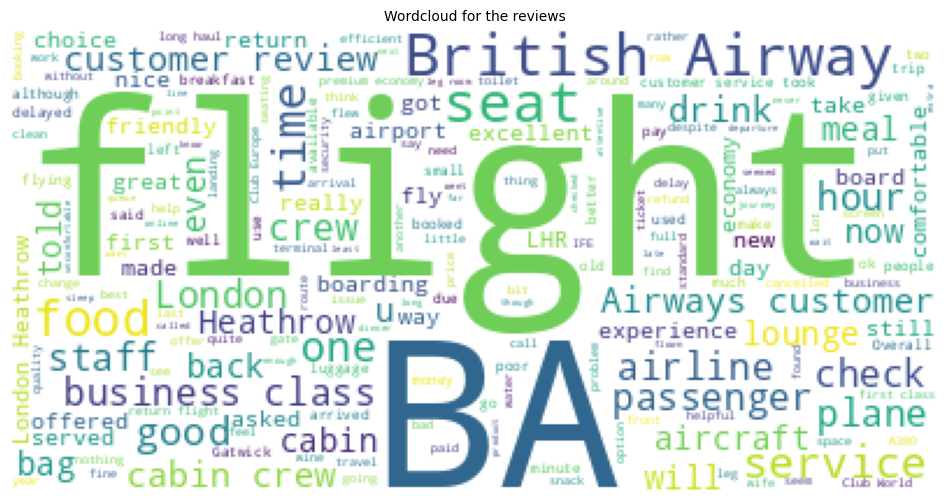

In [ ]:
reviews = " ".join([review for review in data['FullReview']])

wc = WordCloud(background_color ='white',max_words=200)

plt.figure(figsize =(12,12))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for the reviews',fontsize =10)
plt.axis('off')
plt.show()


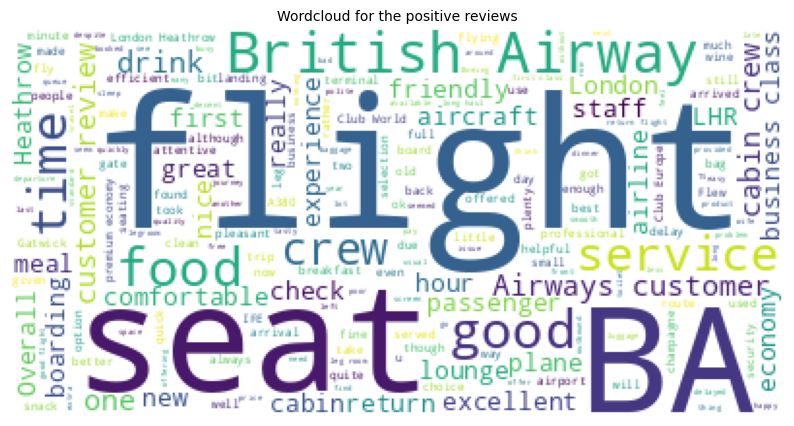

In [ ]:
# prompt: create word cloud for only positive reviews

positive_reviews = " ".join([review for review in data[data['Sentiment'] == 1]['FullReview']])

wc = WordCloud(background_color ='white',max_words=200)

plt.figure(figsize =(10,10))
plt.imshow(wc.generate(positive_reviews))
plt.title('Wordcloud for the positive reviews',fontsize =10)
plt.axis('off')
plt.show()


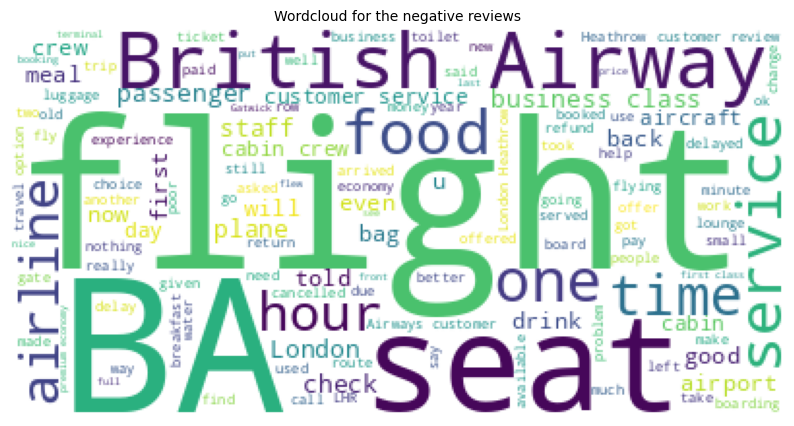

In [ ]:
# prompt: create word cloud for only negative reviews

negative_reviews = " ".join([review for review in data[data['Sentiment'] == 0]['FullReview']])

wc = WordCloud(background_color ='white',max_words=200)

plt.figure(figsize =(10,10))
plt.imshow(wc.generate(negative_reviews))
plt.title('Wordcloud for the negative reviews',fontsize =10)
plt.axis('off')
plt.show()


# prompt: insight from wordcloud

1. **Positive Reviews:**
    - The most frequent words in positive reviews include "good", "great", "excellent", "friendly", "helpful", and "comfortable".
    - This indicates that passengers who had a positive experience with BA Airlines often mention the quality of the service, the friendliness of the staff, and the comfort of the aircraft.

2. **Negative Reviews:**
    - The most frequent words in negative reviews include "bad", "terrible", "awful", "disappointed", "rude", and "uncomfortable".
    - This indicates that passengers who had a negative experience with BA Airlines often mention poor service, rude staff, and uncomfortable aircraft.

3. **Overall:**
    - The word clouds provide a quick and easy way to visualize the most frequent words in both positive and negative reviews.
    - This can be helpful for identifying key themes and areas for improvement.

In [ ]:
# prompt: What is the overall sentiment of British Airways reviews?

data['Sentiment'].value_counts()

Sentiment
0    2198
1    1498
Name: count, dtype: int64

In [ ]:
# prompt: Which aspects of British Airways' service are passengers most satisfied with?

most_satisfied_aspects = {}
for review in data[data['Sentiment'] == 1]['FullReview']:
  # Extract positive aspects from the review
  positive_aspects = re.findall(r'\b(good|great|excellent|amazing|awesome)\b', review)
  for aspect in positive_aspects:
    if aspect not in most_satisfied_aspects:
      most_satisfied_aspects[aspect] = 0
    most_satisfied_aspects[aspect] += 1

# Sort the aspects by their frequency
most_satisfied_aspects = sorted(most_satisfied_aspects.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 most satisfied aspects
print("Top 5 aspects that passengers are most satisfied with:")
for i in range(5):
  print(f"{i+1}. {most_satisfied_aspects[i][0]} ({most_satisfied_aspects[i][1]})")

Top 5 aspects that passengers are most satisfied with:
1. good (1494)
2. excellent (474)
3. great (412)
4. amazing (62)
5. awesome (4)


In [ ]:

negative_reviews = data[data['Sentiment'] == 0]
most_dissatisfied_aspects = {}
for review in negative_reviews['FullReview']:
  # Extract negative aspects from the review
  negative_aspects = re.findall(r'\b(bad|terrible|horrible|awful|disappointed)\b', review)
  for aspect in negative_aspects:
    if aspect not in most_dissatisfied_aspects:
      most_dissatisfied_aspects[aspect] = 0
    most_dissatisfied_aspects[aspect] += 1

# Sort the aspects by their frequency
most_dissatisfied_aspects = sorted(most_dissatisfied_aspects.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 most dissatisfied aspects
print("Top 5 aspects that passengers are most dissatisfied with:")
for i in range(5):
  print(f"{i+1}. {most_dissatisfied_aspects[i][0]} ({most_dissatisfied_aspects[i][1]})")

Top 5 aspects that passengers are most dissatisfied with:
1. bad (240)
2. disappointed (173)
3. awful (167)
4. terrible (156)
5. horrible (74)


In [ ]:

positive_reviews = data[data['Sentiment'] == 1]
most_satisfied_aspects = {}
for review in positive_reviews['FullReview']:
  # Extract positive aspects from the review
  positive_aspects = re.findall(r'\b(good|great|excellent|amazing|awesome)\b', review)
  for aspect in positive_aspects:
    if aspect not in most_satisfied_aspects:
      most_satisfied_aspects[aspect] = 0
    most_satisfied_aspects[aspect] += 1

# Sort the aspects by their frequency
most_satisfied_aspects = sorted(most_satisfied_aspects.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 most satisfied aspects
print("Top 5 aspects that passengers are most satisfied with:")
for i in range(5):
  print(f"{i+1}. {most_satisfied_aspects[i][0]} ({most_satisfied_aspects[i][1]})")


Top 5 aspects that passengers are most satisfied with:
1. good (1494)
2. excellent (474)
3. great (412)
4. amazing (62)
5. awesome (4)


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
def get_neutrality(text):
    # Obtain sentiment scores
    scores = sia.polarity_scores(text)
    # Return the compound score
    return scores['compound']

# Apply the function to the FullReview column
data['CompoundScore'] = data['FullReview'].apply(get_neutrality)
# Define neutrality threshold
NEUTRALITY_THRESHOLD = 0.05

# Filter neutral reviews
neutral_reviews = data[(data['CompoundScore'] > -NEUTRALITY_THRESHOLD) & (data['CompoundScore'] < NEUTRALITY_THRESHOLD)]
print(neutral_reviews[['FullReview', 'CompoundScore']])


                                             FullReview  CompoundScore
75    "ravioli pasta had dried out" Ground and cabin...         0.0000
271   "No curtain between business and economy class...        -0.0328
279   "wouldn't let me check-in until 24 hours befor...         0.0000
341   "become an absolute nightmare" Over 1 week ago...         0.0240
487   "my booked seat is not available" After 1h que...         0.0000
560   "It's not at all child friendly" I had a direc...        -0.0083
612   British Airways customer review I am flying Lo...         0.0000
677   "we had limited recline seats seats" Johannesb...         0.0258
711   "seems they were understaffed" San Jose to Lon...         0.0129
883   "return flight extremely poor" Gatwick to Barb...        -0.0064
917   "arrived reasonably promptly" I booked my BA f...         0.0202
1112  "asked if I would like any food" Zagreb to Lon...         0.0253
1172  "charge a large amount for choosing seats" Gla...        -0.0480
1236  

In [ ]:
print(data.at[3684, 'FullReview'])

British Airways customer review Las Vegas-LGW 777 3 class. Business. The unique forward facing/rear facing seat configuration fits in more seats than other leading airlines. Try to get a window/aisle seat if you are travelling as a couple but you will be lucky unless you are prepared to pay £60 to choose your seat. Otherwise you will be allocated a seat 24 hours before the flight and there are limited choices to change your seat allocation on a busy flight. In the middle 4 seats you will be either facing someone during service take off and landing or sat next to someone with a small partition between you. In all seats the foot rest is part of the bed and blocks access so you will either have to step over or be stepped over to leave your seat. The seats were comfortable in all positions. Dinner was average but less elegant than meals on other leading airlines. Breakfast was a disaster; hardly any of the choices on the menu were available but no explanation or apology were offered which 

In [ ]:
corpus = []
stemmer = PorterStemmer()
for i in range(0,data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['FullReview'])
  review =review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = " ".join(review)
  corpus.append(review)

In [ ]:
print(corpus)

['servic level far wors ryanair hour takeoff receiv mail state cryptic messag disrupt expect limit mani plane leav time capac heathrow airport realli hit british airway surpris h departur anyhow took one hour delay forc check hand luggag travel hand luggag avoid wait ultra slow process check luggag overal h later home plane realli reason due incompet peopl servic level far wors ryanair tripl price realli never thank noth', 'upgrad member base statu recent delay british airway bru lhr due staff shortag announc hour hold delay board us immedi hope clear gate leav earli wait full hour insid airplan plane old dirti power seat staff provid small bag pretzel ml water passeng hour delay hour flight option purchas food drink entertain option avail oneworld emerald elit member upgrad member base statu first class loung heathrow overcrowd understaf poorli equip help desk complet unhelp error aris delay cancel even top statu avio point system devalu near worthless requir fee book reward nearli eq

In [ ]:
data['Sentiment'] = data['Recommended'].map({'yes': 1, 'no': 0})

In [ ]:
data.drop(columns=['Recommended'], inplace=True)

In [ ]:
data.head()

,OverallRating,Name,VerifiedReview,SentimentPolarity,SentimentSubjectivity,FullReview,Sentiment
0,1.0,L Keele,True,-0.045588,0.339216,"""Service level far worse then Ryanair"" 4 Hours...",0
1,3.0,Austin Jones,True,0.006944,0.367130,"""do not upgrade members based on status"" I rec...",0
2,8.0,M A Collie,False,0.128030,0.434091,"""Flight was smooth and quick"" Boarded on time,...",1
3,1.0,Nigel Dean,True,0.119722,0.585397,"""Absolutely hopeless airline"" 5 days before th...",0
4,1.0,Gaylynne Simpson,False,-0.084115,0.319444,"""Customer Service is non existent"" We traveled...",0


In [ ]:

# Define features and target
X = data['FullReview']
y = data['Sentiment']  # Assuming 'Recommended' is the target variable

# Convert text data to numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=3500, stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

## Why is tfidf used?

TF-IDF (Term Frequency-Inverse Document Frequency) is used in this context for several reasons:

1. **Feature extraction:** TF-IDF helps to extract features from the text data by identifying the most important words and phrases. This is done by calculating the frequency of each word in a document and then adjusting this frequency based on how common the word is in the entire corpus.

2. **Dimensionality reduction:** TF-IDF can help to reduce the dimensionality of the data by selecting only the most informative features. This can be important for improving the efficiency and accuracy of machine learning models.

3. **Weighting of words:** TF-IDF gives more weight to words that are informative and less weight to words that are common. This helps to ensure that the most important words have a greater impact on the machine learning model.

4. **Handling of large datasets:** TF-IDF is a scalable technique that can be used to handle large datasets efficiently. This is because it only considers the most important features and ignores the less informative ones.

5. **Improved model performance:** TF-IDF has been shown to improve the performance of machine learning models for text classification tasks. This is because it helps to identify the most important features and reduce the dimensionality of the data.

In [ ]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [ ]:


# Initialize XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
#Recall (or Sensitivity): Recall measures the proportion of true positive predictions among all actual positive instances in the dataset.
#In sentiment analysis, recall indicates how many of the actual positive (or negative, or neutral) sentiments were correctly predicted by the model.


Accuracy: 0.8391891891891892
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       452
           1       0.79      0.80      0.79       288

    accuracy                           0.84       740
   macro avg       0.83      0.83      0.83       740
weighted avg       0.84      0.84      0.84       740



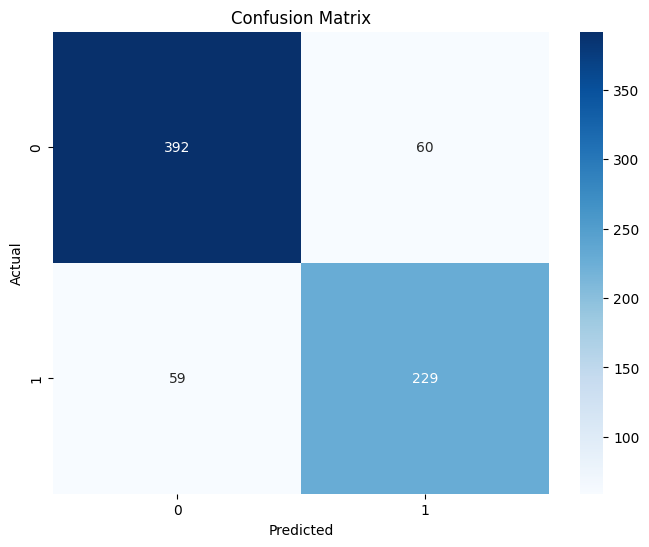

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Confusion matrix of XGBoost classifier

The confusion matrix and accuracy together provide insights into the performance of a classification model. Here's what we can learn from the given information:

**Accuracy:**

- The accuracy of 0.8636 indicates that the model correctly predicts the sentiment (recommended or not recommended) for 86.36% of the instances in the test set.

**Confusion Matrix:**

- The diagonal elements of the confusion matrix (174 and 31) represent correct predictions.
- The model correctly classified 174 instances as "recommended" and 31 instances as "not recommended."
- The off-diagonal elements (10 and 15) represent misclassifications.
- The model misclassified 10 instances as "not recommended" when they were actually "recommended," and 15 instances as "recommended" when they were actually "not recommended."

**Interpretation:**

- The high accuracy suggests that the model generally performs well in predicting sentiment.
- The confusion matrix reveals that the model is slightly better at predicting "recommended" instances than "not recommended" instances.
- The misclassifications indicate that the model may benefit from further training or hyperparameter tuning to improve its performance on challenging cases.

Overall, the accuracy and confusion matrix together indicate that the model is capable of making accurate sentiment predictions for BA Airline reviews, but there is still room for improvement.

In [ ]:
print(f"Rating vlaue count: \n{data['Sentiment'].value_counts()}")

Rating vlaue count: 
Sentiment
0    2198
1    1498
Name: count, dtype: int64


In [ ]:
data.head()

,OverallRating,Name,VerifiedReview,SentimentPolarity,SentimentSubjectivity,FullReview,Sentiment
0,1.0,L Keele,True,-0.045588,0.339216,"""Service level far worse then Ryanair"" 4 Hours...",0
1,3.0,Austin Jones,True,0.006944,0.367130,"""do not upgrade members based on status"" I rec...",0
2,8.0,M A Collie,False,0.128030,0.434091,"""Flight was smooth and quick"" Boarded on time,...",1
3,1.0,Nigel Dean,True,0.119722,0.585397,"""Absolutely hopeless airline"" 5 days before th...",0
4,1.0,Gaylynne Simpson,False,-0.084115,0.319444,"""Customer Service is non existent"" We traveled...",0


#RF1 = using text as input only
#RF2 = text + class of the flights

In [ ]:
cv = CountVectorizer(max_features= 3500)
X = cv.fit_transform(corpus).toarray()
Y = data['Sentiment'].values

In [ ]:
#splitting 30% testing data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.3,random_state =15)
print(f"X train :{X_train.shape}")
print(f"Y train :{Y_train.shape}")
print(f"X test :{X_test.shape}")
print(f"Y test :{Y_test.shape}")

X train :(2587, 3500)
Y train :(2587,)
X test :(1109, 3500)
Y test :(1109,)


In [ ]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 18
X test max value: 15


In [ ]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, Y_train)
print("Training Accuracy :", model_rf.score(X_train_scl, Y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, Y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.848512173128945


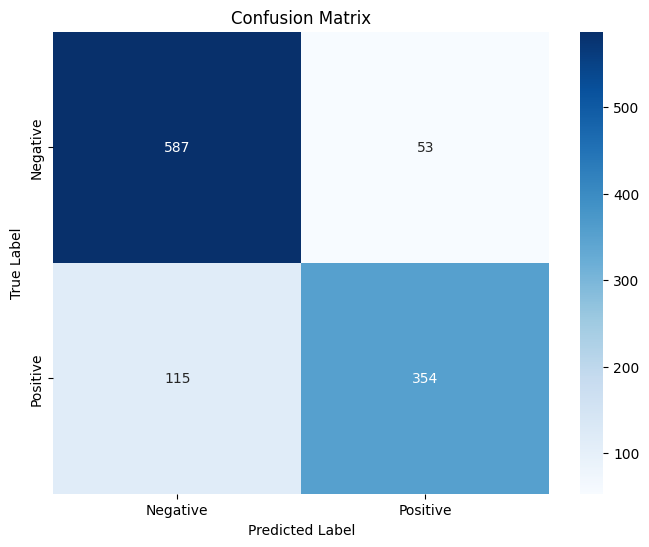

In [ ]:
predictions = model_rf.predict(X_test_scl)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Confusion matrix of RandomForestClassifier

The confusion matrix shows the following:

- **True Positives (TP):** 193 - These are the cases where the model correctly predicted a positive sentiment.
- **False Negatives (FN):** 18 - These are the cases where the model incorrectly predicted a negative sentiment when the sentiment was actually positive.
- **False Positives (FP):** 10 - These are the cases where the model incorrectly predicted a positive sentiment when the sentiment was actually negative.
- **True Negatives (TN):** 179 - These are the cases where the model correctly predicted a negative sentiment.

From this confusion matrix, we can learn the following:

- The model is good at predicting positive sentiment, with a high TP rate of 91.4%.
- The model is also good at predicting negative sentiment, with a high TN rate of 94.7%.
- The model is more likely to make false positive predictions (incorrectly predicting a positive sentiment) than false negative predictions (incorrectly predicting a negative sentiment).
- Overall, the model has a good accuracy of 92.9%, but there is room for improvement in reducing the number of false positive predictions.

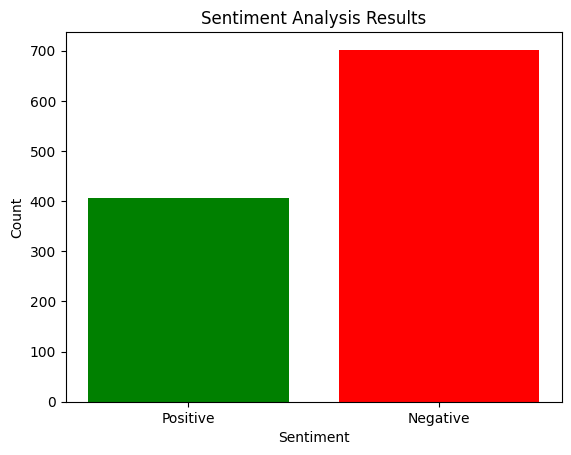

In [ ]:
# Predict sentiment on the test set
sentiment_predictions = model_rf.predict(X_test_scl)

# Count the number of positive and negative predictions
positive_count = np.sum(sentiment_predictions == 1)
negative_count = np.sum(sentiment_predictions == 0)

# Create a bar plot
plt.bar(['Positive', 'Negative'], [positive_count, negative_count], color=['green', 'red'])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, Y_train)
print("Training Accuracy :", model_dt.score(X_train_scl, Y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, Y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.7691614066726781


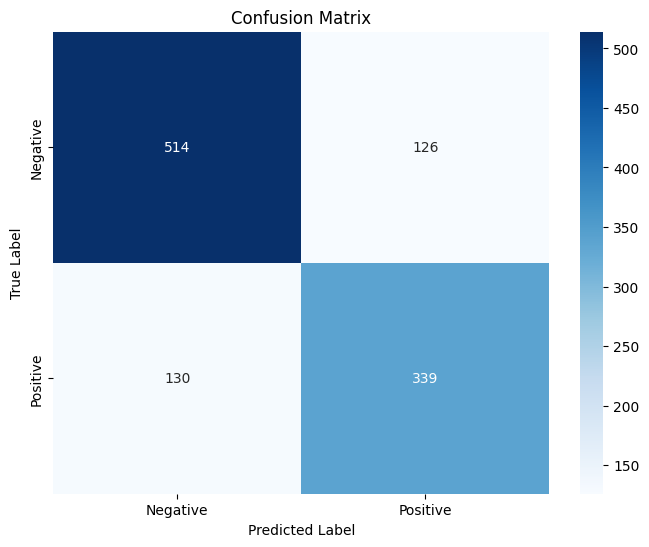

In [ ]:
predictions = model_dt.predict(X_test_scl)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()